In [1]:
# Import Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix, f1_score, recall_score, classification_report

%matplotlib inline

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- There are total 12 columns present with 1599 rows
- dtype of all 11 independent feature is 'float64'
- dtype of dependent(target) attribute is 'int64'

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- Also there is no column with null values

## Data Description

- Fixed Acidity : are non-volatile acids that do not evaporate readily

- Volatile Acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste

- Citric Acid: acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines

- Residual Sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet

- Chlorides: the amount of salt in the wine

- Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine

- Total Sulfur Dioxide: is the amount of free + bound forms of SO2

- Density: sweeter wines have a higher density

- pH: describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale

- Alcohol: available in small quantities in wines makes the drinkers sociable

- Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

- Quality: which is the output variable/predictor

# EDA

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


A few observations from the Description of dataset :

- The quality of wine varies from 3 to 8, where 6 is the average quality.
- The maximum alcohol level in the wine is 14.9 and minimum is 8.4
- The pH level of wine varies between 2.74 to 4.01.
- The average density of wine is 0.9956.
- Total sulpher dioxide varies between 6.0 to 289.0.

# Univariate Analysis

In [8]:
# Start with plotting Histogram

cols_name = list(data.columns)
cols_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

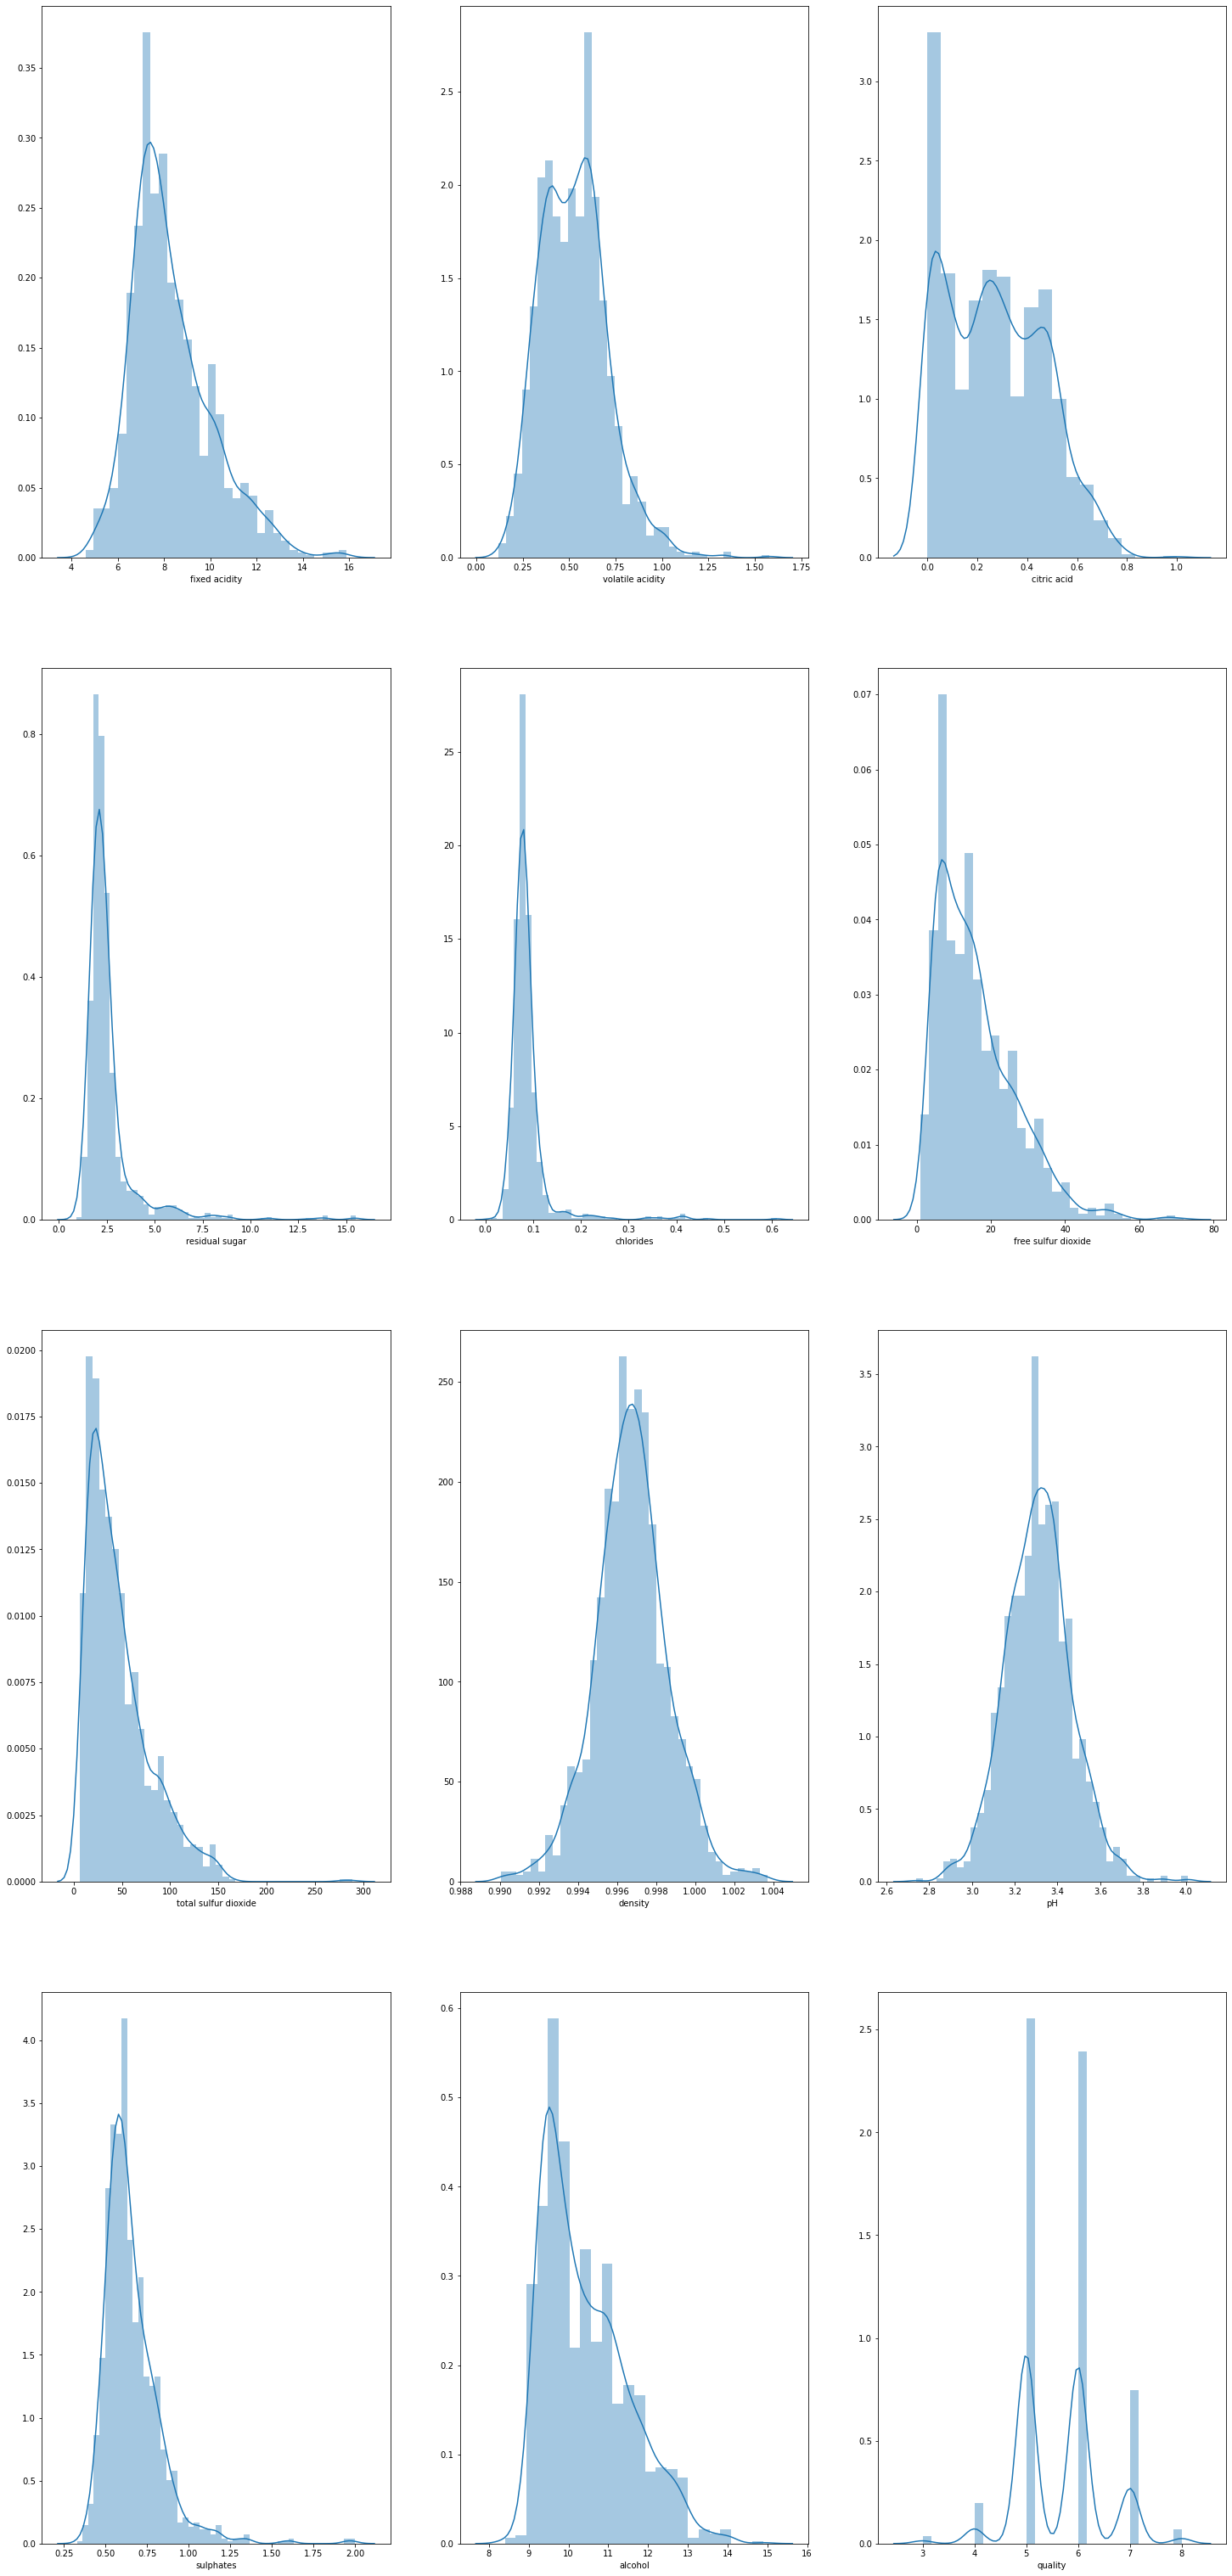

In [9]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.distplot(data[cols_name[i-1]])
plt.show()

- Some Features Contains Normal / Gaussian Distribution
- Some Features have 'right skewness' - residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates
- Let's try to apply Log Transformation to these features

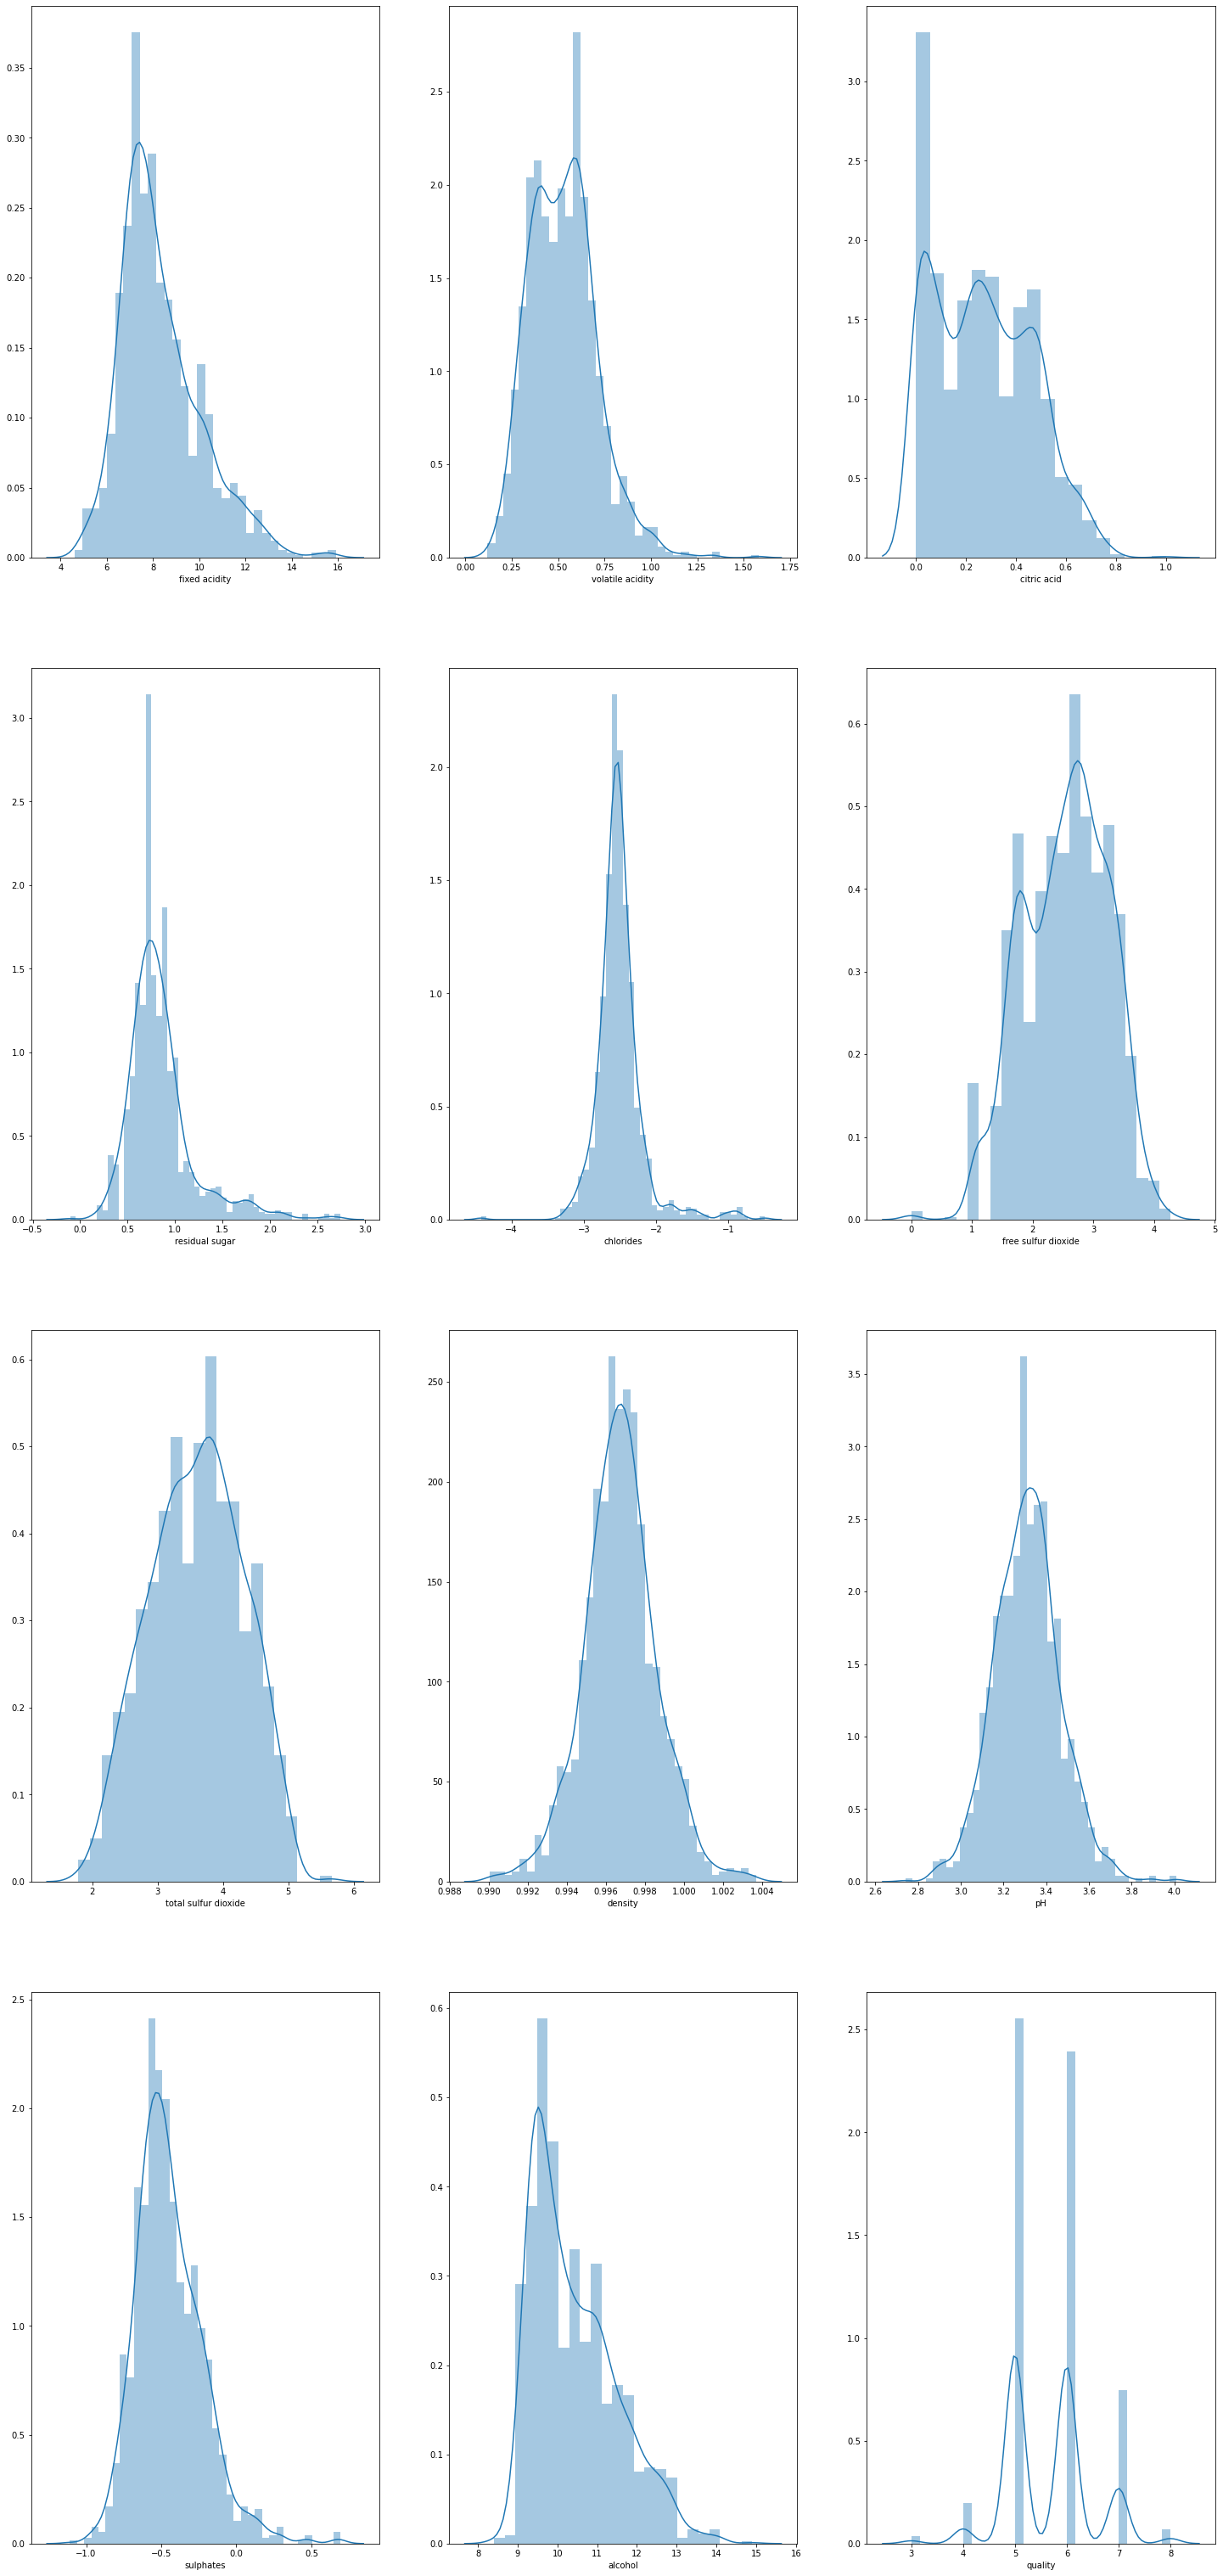

In [10]:
cols = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

for col in cols:
    data[col] = np.log(data[col])
    
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.distplot(data[cols_name[i-1]])
plt.show()

- Now features look Normally Distributed ...!!

In [11]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

- There is no categorical feature present except 'quality' which contains 6 diff categories
- So there are total 6 diffeerent qualities of wine

In [12]:
# Some interesting conclusion to be noted that
# Although there are a total of 240 duplicate rows, 
# we will not be removing them.
# This is because we are assuming that this survey was made by different unique wine tasters who may have given same ratings.

data.duplicated().sum()

240

## Check for Data Imbalance

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


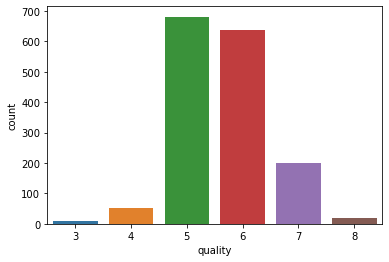

In [13]:
print(data['quality'].value_counts())
sns.countplot('quality', data=data)

- majority of ratings belongs to 2 class - 5 & 6
- We can see there is data imbalance present
- So we have to handle it later

## Check for Outliers

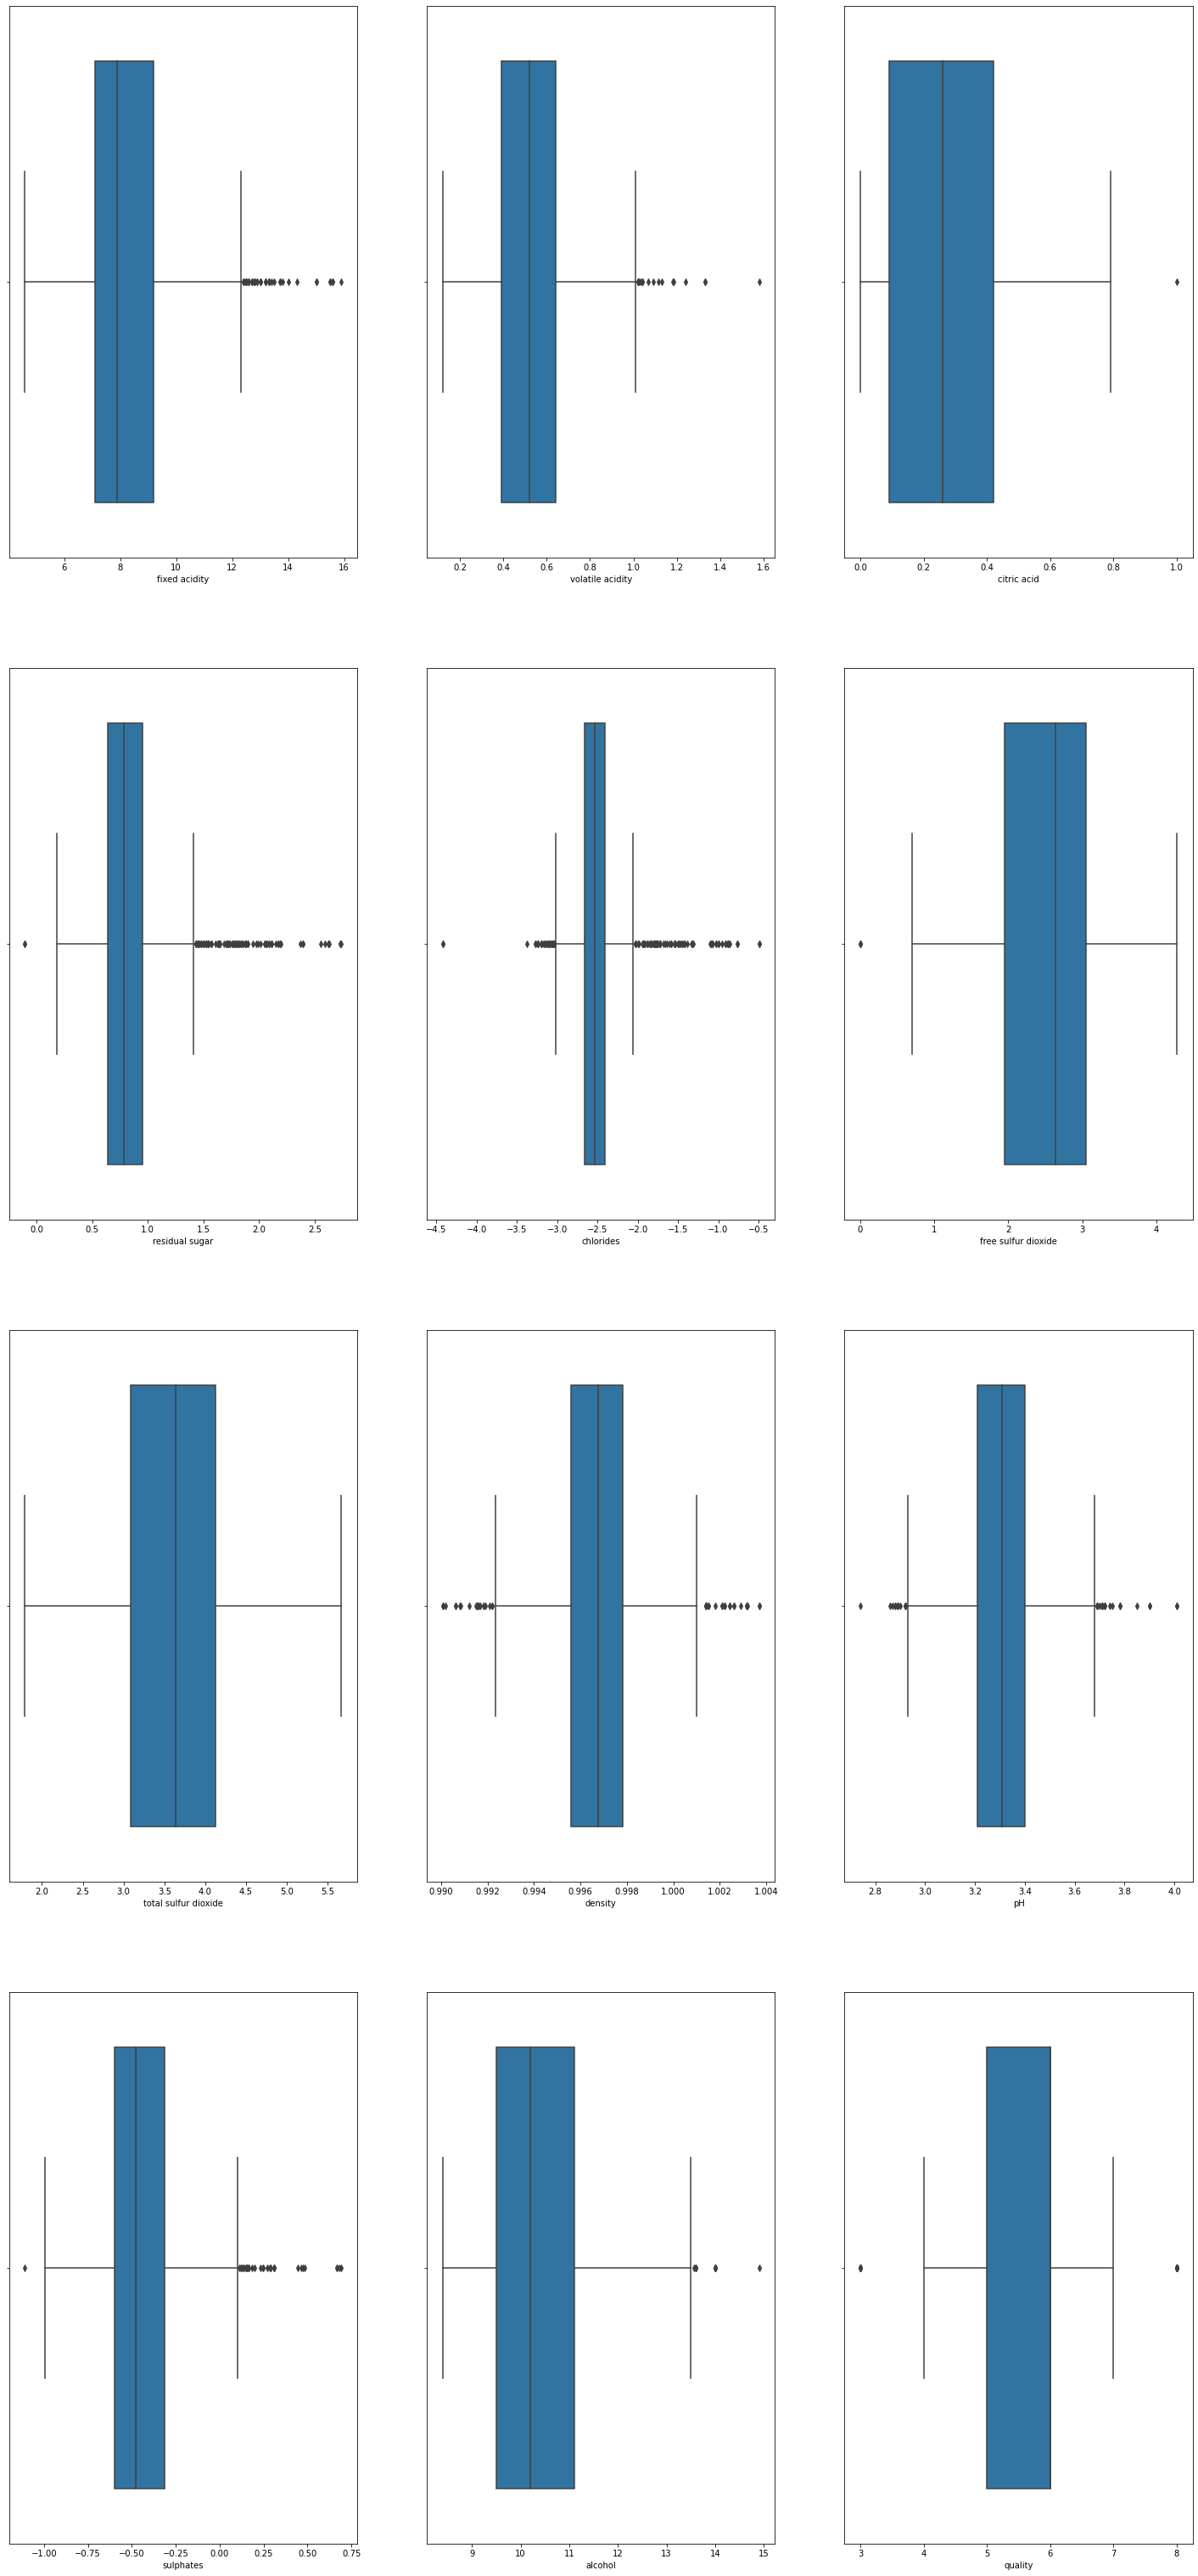

In [14]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)+1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[cols_name[i-1]])
plt.show()

- Except citric acid almost all columns contains lot of outlier
- So we have to handle it too

# Bivariate Analysis

## Let's try to plot corr

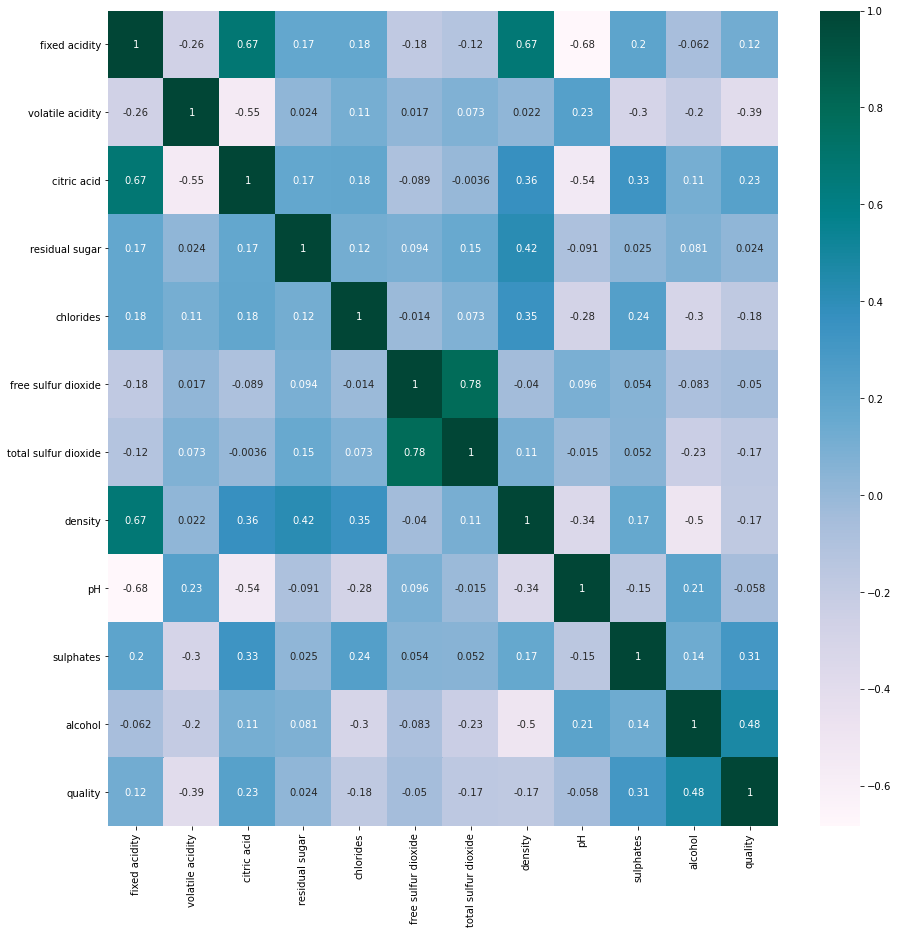

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot=True, cmap= 'PuBuGn')

- We can see that No pair of columns is highly correlated with other

- By seeing Corr with target attribute
- Alcohol, Sulphates, Volatile acidity have the highest correlations among all other features

In [16]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.390558
Name: quality, dtype: float64

## Let's Perform Feature Selection

- Since Some Columns have very less Corr with target attributes, It's better to drop those columns
- 'residual sugar', 'free sulfur dioxide', 'pH'

In [17]:
X = data.drop(columns=['residual sugar', 'free sulfur dioxide', 'pH', 'quality'], axis=1)
y = data['quality']

print(X.shape)
print(y.shape)

(1599, 8)
(1599,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42, stratify=y)

## Random Forest Classifier

Accuracy on Test Data: 68.125%


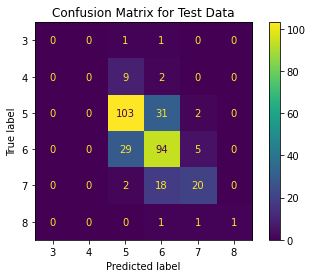

c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.76      0.74       136
           6       0.64      0.73      0.68       128
           7       0.71      0.50      0.59        40
           8       1.00      0.33      0.50         3

    accuracy                           0.68       320
   macro avg       0.51      0.39      0.42       320
weighted avg       0.66      0.68      0.66       320


Accuracy on Whole Data: 93.62101313320825%


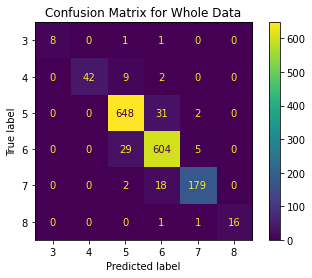

              precision    recall  f1-score   support

           3       1.00      0.80      0.89        10
           4       1.00      0.79      0.88        53
           5       0.94      0.95      0.95       681
           6       0.92      0.95      0.93       638
           7       0.96      0.90      0.93       199
           8       1.00      0.89      0.94        18

    accuracy                           0.94      1599
   macro avg       0.97      0.88      0.92      1599
weighted avg       0.94      0.94      0.94      1599



In [19]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plot_confusion_matrix(rf_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plot_confusion_matrix(rf_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

## XGBoost Classifier

c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Test Data: 65.3125%


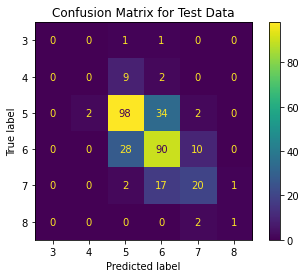

c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.72      0.72       136
           6       0.62      0.70      0.66       128
           7       0.59      0.50      0.54        40
           8       0.50      0.33      0.40         3

    accuracy                           0.65       320
   macro avg       0.40      0.38      0.39       320
weighted avg       0.63      0.65      0.64       320


Accuracy on Whole Data: 93.05816135084429%


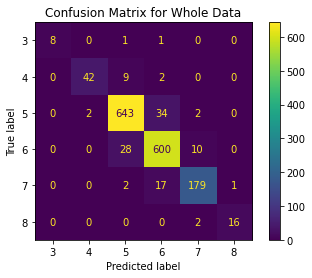

              precision    recall  f1-score   support

           3       1.00      0.80      0.89        10
           4       0.95      0.79      0.87        53
           5       0.94      0.94      0.94       681
           6       0.92      0.94      0.93       638
           7       0.93      0.90      0.91       199
           8       0.94      0.89      0.91        18

    accuracy                           0.93      1599
   macro avg       0.95      0.88      0.91      1599
weighted avg       0.93      0.93      0.93      1599



In [20]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plot_confusion_matrix(xgb_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plot_confusion_matrix(xgb_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

### Though we got good accuracy...!!

## Let's try to handle Data Imbalance with Upsampling

In [21]:
from collections import Counter

counter = Counter(y)
print(counter)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


In [22]:
from imblearn.over_sampling import SMOTE

upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)
print(X.shape)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})
(4086, 8)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42, stratify=y)

## Random Forest Classifier without StandardScaler

Accuracy on Test Data: 88.63080684596576%


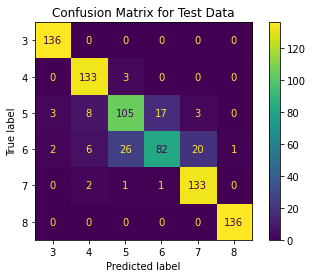

              precision    recall  f1-score   support

           3       0.96      1.00      0.98       136
           4       0.89      0.98      0.93       136
           5       0.78      0.77      0.77       136
           6       0.82      0.60      0.69       137
           7       0.85      0.97      0.91       137
           8       0.99      1.00      1.00       136

    accuracy                           0.89       818
   macro avg       0.88      0.89      0.88       818
weighted avg       0.88      0.89      0.88       818


Accuracy on Whole Data: 97.72393538913363%


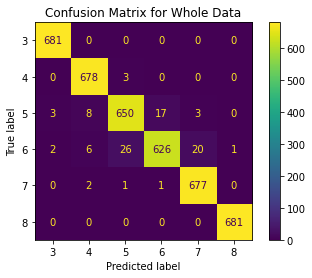

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       681
           4       0.98      1.00      0.99       681
           5       0.96      0.95      0.96       681
           6       0.97      0.92      0.94       681
           7       0.97      0.99      0.98       681
           8       1.00      1.00      1.00       681

    accuracy                           0.98      4086
   macro avg       0.98      0.98      0.98      4086
weighted avg       0.98      0.98      0.98      4086



In [24]:
rf = RandomForestClassifier(random_state = 18)
rf.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plot_confusion_matrix(rf, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = rf.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plot_confusion_matrix(rf, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

## Random Forest Classifier with StandardScaler

Accuracy on Test Data: 88.38630806845967%


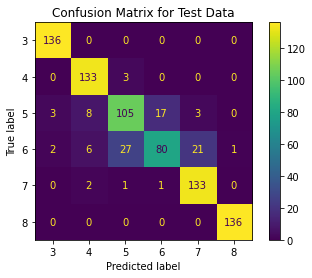

              precision    recall  f1-score   support

           3       0.96      1.00      0.98       136
           4       0.89      0.98      0.93       136
           5       0.77      0.77      0.77       136
           6       0.82      0.58      0.68       137
           7       0.85      0.97      0.90       137
           8       0.99      1.00      1.00       136

    accuracy                           0.88       818
   macro avg       0.88      0.88      0.88       818
weighted avg       0.88      0.88      0.88       818


Accuracy on Whole Data: 97.6749877630935%


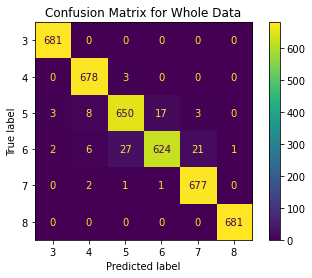

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       681
           4       0.98      1.00      0.99       681
           5       0.95      0.95      0.95       681
           6       0.97      0.92      0.94       681
           7       0.97      0.99      0.98       681
           8       1.00      1.00      1.00       681

    accuracy                           0.98      4086
   macro avg       0.98      0.98      0.98      4086
weighted avg       0.98      0.98      0.98      4086



In [25]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plot_confusion_matrix(rf_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plot_confusion_matrix(rf_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

## XGBoost Classifier

[14:23:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\rkshi\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy on Test Data: 86.06356968215158%


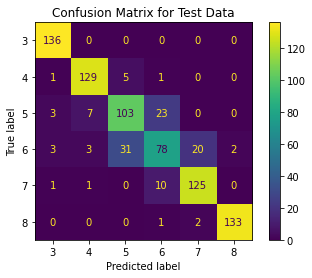

              precision    recall  f1-score   support

           3       0.94      1.00      0.97       136
           4       0.92      0.95      0.93       136
           5       0.74      0.76      0.75       136
           6       0.69      0.57      0.62       137
           7       0.85      0.91      0.88       137
           8       0.99      0.98      0.98       136

    accuracy                           0.86       818
   macro avg       0.86      0.86      0.86       818
weighted avg       0.86      0.86      0.86       818


Accuracy on Whole Data: 97.20998531571219%


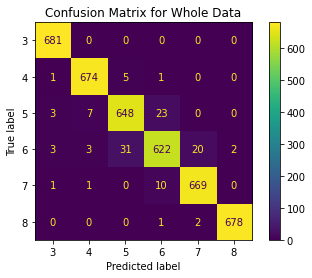

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       681
           4       0.98      0.99      0.99       681
           5       0.95      0.95      0.95       681
           6       0.95      0.91      0.93       681
           7       0.97      0.98      0.98       681
           8       1.00      1.00      1.00       681

    accuracy                           0.97      4086
   macro avg       0.97      0.97      0.97      4086
weighted avg       0.97      0.97      0.97      4086



In [26]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plot_confusion_matrix(xgb_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plot_confusion_matrix(xgb_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

## KNN - Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier 

# Find right n_neighors

for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.7909535452322738
For n_neighbors =  10  score is  0.7506112469437652
For n_neighbors =  15  score is  0.7273838630806846
For n_neighbors =  20  score is  0.6968215158924206


In [28]:
# For weights = 'distance'

# Try with weights

for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8422982885085575
For n_neighbors =  10  score is  0.8251833740831296
For n_neighbors =  15  score is  0.8080684596577017
For n_neighbors =  20  score is  0.7970660146699267


Accuracy on Test Data: 85.69682151589242%


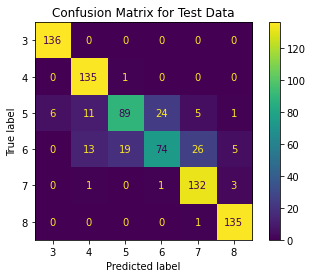

              precision    recall  f1-score   support

           3       0.96      1.00      0.98       136
           4       0.84      0.99      0.91       136
           5       0.82      0.65      0.73       136
           6       0.75      0.54      0.63       137
           7       0.80      0.96      0.88       137
           8       0.94      0.99      0.96       136

    accuracy                           0.86       818
   macro avg       0.85      0.86      0.85       818
weighted avg       0.85      0.86      0.85       818


Accuracy on Whole Data: 97.13656387665198%


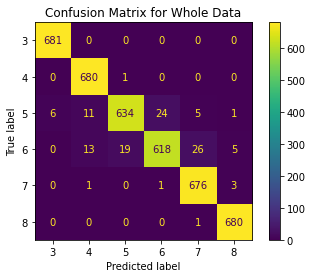

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       681
           4       0.96      1.00      0.98       681
           5       0.97      0.93      0.95       681
           6       0.96      0.91      0.93       681
           7       0.95      0.99      0.97       681
           8       0.99      1.00      0.99       681

    accuracy                           0.97      4086
   macro avg       0.97      0.97      0.97      4086
weighted avg       0.97      0.97      0.97      4086



In [29]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, weights='distance'))
knn_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plot_confusion_matrix(knn_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test, predictions))

print()

# Accuray On Whole Data
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plot_confusion_matrix(knn_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

# Conclusion :
### Random Forest Perfomed Very Good (~98% accuracy).
### Since there are many algorithms available which is good at handling outlier so No need to Handle outliers.
### By just performing 'Feature Selection' we got very good Accuracy.